# Reading snapshots

[![Binder](https://mybinder.org/badge_logo.svg)](https://binder.flatironinstitute.org/v2/user/fvillaescusa/Quijote?filepath=/Tutorials/Reading_snapshots.ipynb)

In [1]:
import numpy as np
import readgadget

get the name of the snapshot

In [2]:
snapshot = '/home/jovyan/Data/Snapshots/Om_p/32/snapdir_004/snap_004'

read the header of the snapshot

In [3]:
# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h)

print('BoxSize = %.3f Mpc/h'%BoxSize)
print('Total number of particles:',Nall)
print('Masses of the particles:',Masses, 'Msun/h')
print('Omega_m = %.3f'%Omega_m)
print('Omega_L = %.3f'%Omega_l)
print('h = %.3f'%h)
print('redshift = %.3f'%redshift)
print('H(z=%.1f)=%.3f (km/s)/(Mpc/h)'%(redshift,Hubble))

BoxSize = 1000.000 Mpc/h
Total number of particles: [        0 134217728         0         0         0         0]
Masses of the particles: [0.00000000e+00 6.77240019e+11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] Msun/h
Omega_m = 0.328
Omega_L = 0.672
h = 0.671
redshift = 0.000
H(z=0.0)=100.000 (km/s)/(Mpc/h)


For N-body simulations, we only care about particle type 1 (and type 2 if neutrinos are included)

In [4]:
mass_c = Masses[1]
N_c = Nall[1]
print('Mass of a DM particle = %.3e Msun/h'%mass_c)
print('Number of DM particles = %d'%N_c)

Mass of a DM particle = 6.772e+11 Msun/h
Number of DM particles = 134217728


In [5]:
# we can check the value of Omega_m
rho_crit = 2.775e11 #critical density at z=0 in (Msun/h)/(Mpc/h)^3
estimated_Omega_m = N_c*mass_c/BoxSize**3/rho_crit
print('%.4f should be similar to\n%.4f'%(estimated_Omega_m,Omega_m))

0.3276 should be similar to
0.3275


Now lets read the positions, velocities, and IDs of the DM particles

In [6]:
ptype = [1] #DM is 1, neutrinos is [2]
pos   = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h
vel   = readgadget.read_block(snapshot, "VEL ", ptype)     #peculiar velocities in km/s
ids   = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

Lets print some information about these quantities

In [7]:
print('%.3f < X  < %.3f Mpc/h'%(np.min(pos[:,0]), np.max(pos[:,0])))
print('%.3f < Y  < %.3f Mpc/h'%(np.min(pos[:,1]), np.max(pos[:,1])))
print('%.3f < Z  < %.3f Mpc/h'%(np.min(pos[:,2]), np.max(pos[:,2])))
print('%.3f < Vx < %.3f km/s'%(np.min(vel[:,0]), np.max(vel[:,0])))
print('%.3f < Vy < %.3f km/s'%(np.min(vel[:,1]), np.max(vel[:,1])))
print('%.3f < Vz < %.3f km/s'%(np.min(vel[:,2]), np.max(vel[:,2])))
print('%d < IDs < %d'%(np.min(ids), np.max(ids)))

0.000 < X  < 999.992 Mpc/h
0.000 < Y  < 999.992 Mpc/h
0.000 < Z  < 999.992 Mpc/h
-4777.000 < Vx < 5332.000 km/s
-4387.000 < Vy < 4999.000 km/s
-4977.000 < Vz < 4632.000 km/s
0 < IDs < 134217727


You can get the position, velocity, and ID of a particle just by calling its index

In [8]:
# lets consider the particle number 10
print('position =',pos[10],'Mpc/h')
print('velocity =',vel[10],'km/s')
print('ID =',ids[10])

position = [  9.89725 996.024    15.1425 ] Mpc/h
velocity = [ 356.25  -327.125 -153.   ] km/s
ID = 10


The particles IDs can be used to track particles across times. Lets take the particle with ID equal to 623 and find
its position across redshifts

In [9]:
part_ID = 620
for snapnum in [0,1,2,3,4]:
    snapshot = '/home/jovyan/Data/Snapshots/Om_p/32/snapdir_%03d/snap_%03d'%(snapnum,snapnum)
    
    # read header
    header   = readgadget.header(snapshot)
    redshift = header.redshift     #redshift of the snapshot
    
    # read positions and ids
    pos = readgadget.read_block(snapshot, "POS ", [1])/1e3 #positions in Mpc/h
    ids = readgadget.read_block(snapshot, "ID  ", [1])-1   #IDs starting from 0
    
    index = np.where(ids==part_ID)[0]
    position = pos[index][0]
    print('z=%.1f -----> (X,Y,Z)=(%.2f, %.2f, %.2f) Mpc/h'%(redshift,position[0],position[1],position[2]))

z=3.0 -----> (X,Y,Z)=(2.14, 16.49, 86.31) Mpc/h
z=2.0 -----> (X,Y,Z)=(2.87, 16.15, 86.48) Mpc/h
z=1.0 -----> (X,Y,Z)=(4.18, 15.80, 86.84) Mpc/h
z=0.5 -----> (X,Y,Z)=(4.97, 15.25, 87.17) Mpc/h
z=0.0 -----> (X,Y,Z)=(6.31, 14.28, 87.94) Mpc/h


Keep in mind the simulations have periodic boundary conditions. For instance, this is the incorrect and correct way
to compute the distance between them

In [10]:
particle1 = pos[3]
particle2 = pos[4]
print('Position of particle 1: (%.3f, %.3f, %.3f) Mpc/h'%(particle1[0], particle1[1], particle1[2]))
print('Position of particle 2: (%.3f, %.3f, %.3f) Mpc/h'%(particle2[0], particle2[1], particle2[2]))

Position of particle 1: (4.534, 3.950, 998.616) Mpc/h
Position of particle 2: (4.922, 4.519, 2.621) Mpc/h


In [11]:
# this would be the incorrect way to compute the distance
d = np.sqrt(np.sum((particle1-particle2)**2))
print('Incorrect distance = %.3f Mpc/h'%d)

# this would be the correct way to compute the distance
d = particle1-particle2
indexes = np.where(d>BoxSize/2)
d[indexes]-=BoxSize
indexes = np.where(d<-BoxSize/2)
d[indexes]+=BoxSize
d = np.sqrt(np.sum(d**2))
print('Correct distance   = %.3f Mpc/h'%d)

Incorrect distance = 995.995 Mpc/h
Correct distance   = 4.064 Mpc/h


In simulations with massive neutrinos, you can read both dark matter and neutrino positions, velocities, and IDs

In [12]:
# get the name of the snapshot
snapshot = '/home/jovyan/Data/Snapshots/Mnu_p/284/snapdir_002/snap_002'

# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h)

print('BoxSize = %.3f Mpc/h'%BoxSize)
print('Total number of particles:',Nall)
print('Masses of the particles:',Masses, 'Msun/h')
print('Omega_m = %.3f'%Omega_m)
print('Omega_L = %.3f'%Omega_l)
print('h = %.3f'%h)
print('redshift = %.3f'%redshift)
print('H(z=%.1f)=%.3f (km/s)/(Mpc/h)'%(redshift,Hubble))

BoxSize = 1000.000 Mpc/h
Total number of particles: [        0 134217728 134217728         0         0         0]
Masses of the particles: [0.00000000e+00 6.51631041e+11 4.92989376e+09 0.00000000e+00
 0.00000000e+00 0.00000000e+00] Msun/h
Omega_m = 0.318
Omega_L = 0.682
h = 0.671
redshift = 1.000
H(z=1.0)=179.513 (km/s)/(Mpc/h)


As can be seeing, particle type 2 (neutrinos) have millions particles and the masses are not zero

In [13]:
mass_c = Masses[1]
mass_n = Masses[2]
N_c = Nall[1]
N_n = Nall[2]
print('Mass of a DM particle = %.3e Msun/h'%mass_c)
print('Mass of a NU particle = %.3e Msun/h'%mass_n)
print('Number of DM particles = %d'%N_c)
print('Number of NU particles = %d'%N_n)

Omega_m_estimated = (N_c*mass_c + N_n*mass_n)/BoxSize**3/rho_crit
Omega_c_estimated = (N_c*mass_c)/BoxSize**3/rho_crit
Omega_n_estimated = (N_n*mass_n)/BoxSize**3/rho_crit
print('Omega_cb = %.3f'%Omega_c_estimated)
print('Omega_nu = %.3e'%Omega_n_estimated)
print('Omega_m  = %.3f'%Omega_m_estimated)

Mass of a DM particle = 6.516e+11 Msun/h
Mass of a NU particle = 4.930e+09 Msun/h
Number of DM particles = 134217728
Number of NU particles = 134217728
Omega_cb = 0.315
Omega_nu = 2.384e-03
Omega_m  = 0.318


Now lets read the positions, velocities, and IDs of the dark matter and neutrino particles

In [14]:
pos_c = readgadget.read_block(snapshot, "POS ", [1])/1e3 #positions in Mpc/h
vel_c = readgadget.read_block(snapshot, "VEL ", [1])     #peculiar velocities in km/s
ids_c = readgadget.read_block(snapshot, "ID  ", [1])-1   #IDs starting from 0

pos_n = readgadget.read_block(snapshot, "POS ", [2])/1e3 #positions in Mpc/h
vel_n = readgadget.read_block(snapshot, "VEL ", [2])     #peculiar velocities in km/s
ids_n = readgadget.read_block(snapshot, "ID  ", [2])-1   #IDs starting from 0

Lets make a plot with the distribution of the dark matter and neutrino velocities

In [15]:
# lets compute the modulus of the dark matter and neutrino velocities
Vc = np.sqrt(vel_c[:,0]**2 + vel_c[:,1]**2 + vel_c[:,2]**2)
Vn = np.sqrt(vel_n[:,0]**2 + vel_n[:,1]**2 + vel_n[:,2]**2)
print('%.3f < Vc < %.3f'%(np.min(Vc), np.max(Vc)))
print('%.3f < Vn < %.3f'%(np.min(Vn), np.max(Vn)))

bins_histo = np.logspace(0,5,1000)
histo_Vc, edges = np.histogram(Vc, bins_histo)
histo_Vn, edges = np.histogram(Vn, bins_histo)

0.811 < Vc < 4902.378
13.396 < Vn < 60315.773


As can be seen, neutrinos have, on average, larger velocities than dark matter

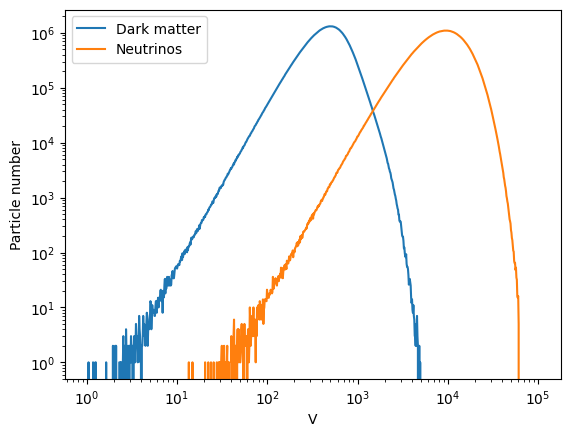

In [16]:
import matplotlib.pyplot as plt
plt.xscale('log')
plt.yscale('log')
plt.xlabel('V')
plt.ylabel('Particle number')
plt.plot(edges[1:], histo_Vc)
plt.plot(edges[1:], histo_Vn)
plt.legend(['Dark matter', 'Neutrinos'])
plt.show()